### Importando bibliotecas

In [6]:
import os
import warnings
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from model_methods import ModelingML
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

warnings.filterwarnings('ignore')

#### Importando dataset com dados já balanceados

In [2]:
data = pd.read_csv(os.getcwd().replace('code', 'data').replace('Modeling', 'processed') + '\\balanced_data.csv')
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,50.949999,1.334565,19.135835,1.0,0.0,0.0,1.0,1.0
1,12.637625,0.449998,0.833165,1.0,1.0,0.0,1.0,0.0
2,138.976719,0.170346,2.039094,1.0,0.0,0.0,1.0,1.0
3,10.092660,0.461320,0.769604,1.0,0.0,0.0,0.0,0.0
4,34.763383,0.493386,2.287777,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
34881,3.097137,0.005010,0.863223,1.0,0.0,0.0,1.0,0.0
34882,4.858144,1.136540,6.681870,1.0,0.0,0.0,1.0,1.0
34883,5.339294,0.180431,3.970471,1.0,1.0,0.0,1.0,0.0
34884,0.797008,9.136527,4.447919,0.0,0.0,0.0,0.0,1.0


#### Separando conjunto de treino e teste

In [3]:
x = data.drop('fraud', axis=1)
y = data.fraud

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)

In [10]:
# define modelo
model = SVC(kernel='rbf')

# define escalonador
scaler = RobustScaler()

# atribui numero de folds para análisar validação crusada nos modelos
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Aplicando modelo SVM

In [11]:
# atribui a classe que criamos
method = ModelingML()

In [12]:
# executa função de regressão logística e atribui retorno da função às variáveis
y_pred, accuracy, cm, fpr, tpr, thresholds, auc = method.classification_model(model, scaler, x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96      3500
         1.0       0.93      0.99      0.96      3478

    accuracy                           0.96      6978
   macro avg       0.96      0.96      0.96      6978
weighted avg       0.96      0.96      0.96      6978

------------------------------------------------------------
A acurácia do modelo de Regressão Logística é: 0.9564345084551448
------------------------------------------------------------


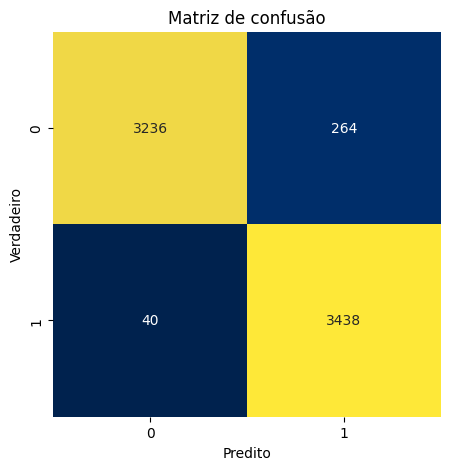

In [13]:
# exibe métricas de validação
metrics = method.metrics_validation(y_test, y_pred, accuracy, cm)

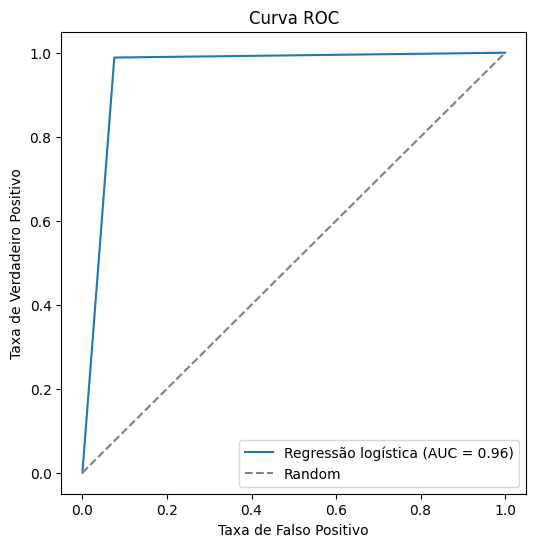

In [14]:
cros_val = method.cross_val(fpr, tpr, auc)